In [1]:
# Import libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Apply one-hot encoder
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [4]:
# Create feature dataset, X
X = insurance_one_hot.drop("charges", axis=1)
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [5]:
# Create label dataset, y
y = insurance_one_hot["charges"]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [6]:
# Create training and testing subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [7]:
# Create NN model
tf.random.set_seed(42)
insurance_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

In [8]:
# Compile the model
insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

In [9]:
# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8633.0430 - mae: 8633.0430
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7872.3008 - mae: 7872.3008
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7502.0039 - mae: 7502.0039
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7781.7090 - mae: 7781.7090
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7739.8701 - mae: 7739.8701
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7622.5249 - mae: 7622.5249
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7612.3745 - mae: 7612.3745
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7694.2075 - mae: 7694.2075
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7621.5195 - mae: 7621.5195
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7676.3418 - mae: 7676.3418

In [10]:
# Check the results
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8939.0400 - mae: 8939.0400


[8939.0400390625, 8939.0400390625]

## Improving the model performance

In [11]:
# Adding extra layer and use Adam optimiser
insurance_model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13294.2314 - mae: 13294.2314
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13137.8535 - mae: 13137.8535
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 12811.0625 - mae: 12811.0625
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 12167.0117 - mae: 12167.0117
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 11072.3379 - mae: 11072.3379
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 9636.8154 - mae: 9636.8154
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 8282.0117 - mae: 8282.0117
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7568.8140 - mae: 7568.8140
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7435.4282 - mae: 7435.4282
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7414.2114 - mae:

In [12]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4960.3174 - mae: 4960.3174


[4960.3173828125, 4960.3173828125]

In [13]:
# Train for longer
insurance_model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 13301.1328 - mae: 13301.1328
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 13143.8281 - mae: 13143.8281
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12815.8711 - mae: 12815.8711
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 12168.5898 - mae: 12168.5898
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 11065.5195 - mae: 11065.5195
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 9616.2529 - mae: 9616.2529
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 8253.8418 - mae: 8253.8418
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7555.9277 - mae: 7555.9277
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 7434.4951 - mae: 7434.4951
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 7413.0347 - mae:

In [14]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3484.1589 - mae: 3484.1589


[3484.158935546875, 3484.158935546875]

Text(0.5, 0, 'epochs')

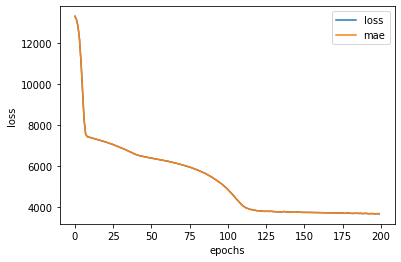

In [15]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [16]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


<AxesSubplot:ylabel='Frequency'>

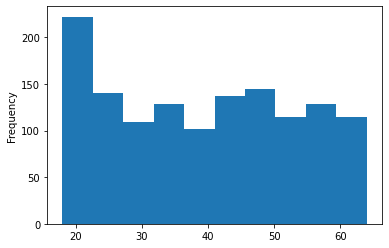

In [17]:
X["age"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

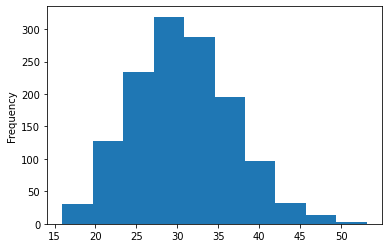

In [18]:
X["bmi"].plot(kind="hist")

In [19]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64